In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
import xgboost as xgb
color = sns.color_palette()
import os
%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)

In [3]:
data_dir = '/Users/Ira/workspace/data/chem'

In [4]:
train_df = pd.read_csv(data_dir+os.sep+"desc-fp4_usr_new-reaxys-mwlt500-logp-5to10-singletons-noiostope_withtitle.csv", sep=',')
train_df.shape

(50217, 191)

In [5]:
train_df.head()

,FF1,FF2,FF3,FF4,FF5,FF6,FF7,FF8,FF9,FF10,FF11,FF12,FF13,FF14,FF15,FF16,FF17,FF18,FF19,FF20,FF21,FF22,FF23,FF24,FF25,FF26,FF27,FF28,FF29,FF30,FF31,FF32,FF33,FF34,FF35,FF36,FF37,FF38,FF39,FF40,FF41,FF42,FF43,FF44,FF45,FF46,FF47,FF48,FF49,FF50,FF51,FF52,FF53,FF54,FF55,FF56,FF57,FF58,FF59,FF60,FF61,FF62,FF63,FF64,FF65,FF66,FF67,FF68,FF69,FF70,FF71,FF72,FF73,FF74,FF75,FF76,FF77,FF78,FF79,FF80,FF81,FF82,FF83,FF84,FF85,FF86,FF87,FF88,FF89,FF90,FF91,FF92,FF93,FF94,FF95,FF96,FF97,FF98,FF99,FF100,FF101,FF102,FF103,FF104,FF105,FF106,FF107,FF108,FF109,FF110,FF111,FF112,FF113,FF114,FF115,FF116,FF117,FF118,FF119,FF120,FF121,FF122,FF123,FF124,FF125,FF126,FF127,FF128,FF129,FF130,FF131,FF132,FF133,FF134,FF135,FF136,FF137,FF138,FF139,FF140,FF141,FF142,FF143,FF144,FF145,FF146,FF147,FF148,FF149,FF150,FF151,FF152,FF153,FF154,FF155,FF156,FF157,FF158,FF159,FF160,FF161,FF162,FF163,FF164,FF165,FF166,FF167,FF168,FF169,FF170,FF171,FF172,FF173,FF174,FF175,FF176,FF177,FF178,FF179,FF180,FF181,FF182,FF183,FF184,FF185,FF186,FF187,FF188,FF189,FF190,FF191
0,1083,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.66176,0.284964,-0.442021,1.79592,0.956496,-0.706329,2.66501,2.34598,-0.619719,2.15594,1.83040,-0.017420,1.39637,0.335028,6.381290e-01,1.15243,0.590272,-1.154640e+00,1.64651,1.424830,-7.015780e-01,3.038400,0.758509,0.965230,2.13739,0.000000,0.000000e+00,2.91641,0.000000,0.000000,4.30536,0.000000,0.000000,0.00000,0.000000,0.000000e+00,2.13739,0.000000,0.00000,2.91641,0.000000,0.000000,4.30536,0.000000,0.000000e+00,0.00000,0.000000e+00,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,99.1741,0.920
1,1131,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.73543,0.490963,-0.878241,1.78049,0.720727,-1.154580,2.85947,2.33020,-0.757503,2.41959,2.04834,-0.185082,1.99354,0.198463,5.958750e-07,1.97138,0.385835,-3.956810e-07,4.17884,0.258773,-1.040570e-06,0.754644,1.138970,0.000000,1.78239,0.777417,2.766920e-07,1.97086,0.487154,0.000000,1.45544,4.236590,0.000000,3.46847,2.290090,-3.405210e-07,2.40586,0.000000,0.00000,2.46439,0.000000,0.000000,0.00000,0.000000,0.000000e+00,4.53854,0.000000e+00,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,114.1890,0.310
2,1366,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.58919,0.317231,-0.416088,1.70039,0.880079,-0.655204,2.62714,2.26764,-0.630232,2.08592,1.80617,0.086056,1.58022,0.435667,-4.177140e-01,1.33110,0.999116,-4.053560e-01,1.95512,2.585050,-1.021570e-01,2.716620,1.427830,0.335439,1.48636,0.291854,-2.656060e-01,1.73387,1.046680,-0.720748,3.06499,1.110730,-0.303458,1.72033,1.044730,-6.916990e-01,1.70209,0.000000,0.00000,2.39498,0.000000,0.000000,3.76865,0.000000,0.000000e+00,1.35958,0.000000e+00,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,0.0,93.1265,1.200
3,1368,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.37147,0.385196,-0.940585,1.40804,0.607803,-0.942806,1.77614,1.41596,0.030625,2.27419,1.85337,-0.679211,1.75886,0.000000,0.000000e+00,1.49248,0.000000,0.000000e+00,3.57770,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.29399,0.436472,-6.556010e-01,1.39116,0.757615,-0.799479,1.41583,0.796266,-0.761147,2.72903,0.765127,-2.951670e-01,1.

In [6]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,129
1,float64,62


In [12]:
print(train_df.FF191.mean())
print(train_df.FF191.var())

3.0408358038745744
2.6080319094213302


# Build Analysis Model-Run 1 

In [17]:
data_y = train_df.FF191.values
data_X = train_df.drop(['FF1','FF191'], axis=1)

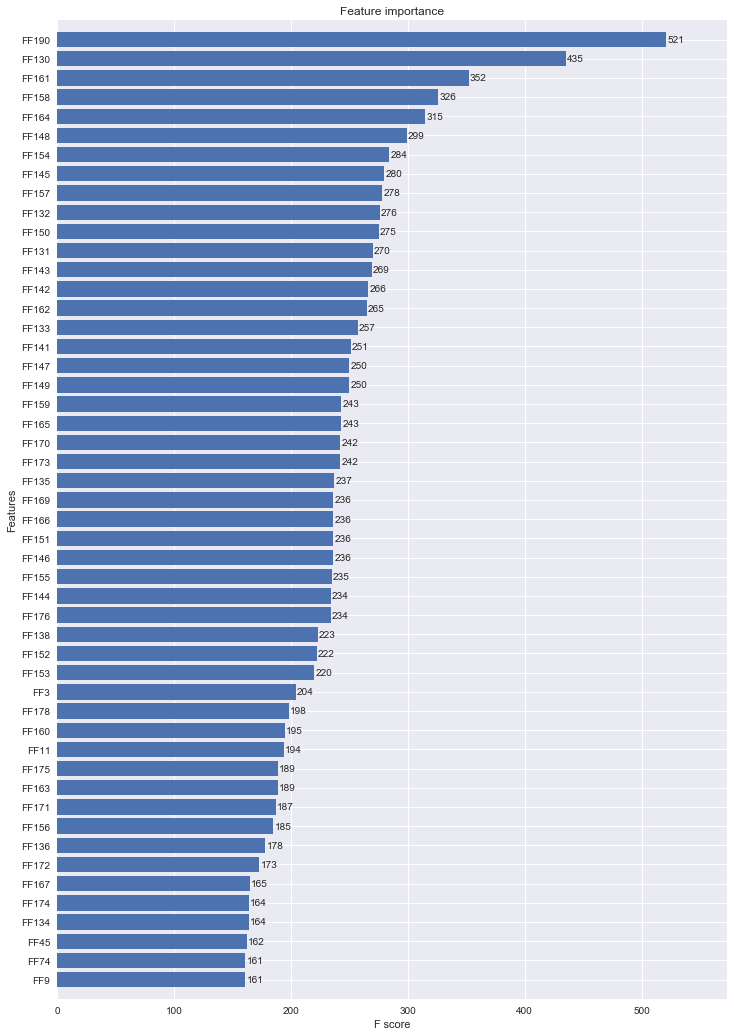

In [18]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 0
}
dtrain = xgb.DMatrix(data_X, data_y, feature_names=data_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
import math

ypred = model.predict(dtrain)
#print(data_y)
#print(ypred)


mse = mean_squared_error(data_y, ypred)
rmse = math.pow(mse,0.5)

print("root mean squared error(training): %.2f" % (rmse))

root mean squared error: 0.83


# validation 

In [ ]:
test_df = pd.read_csv(data_dir+os.sep+"desc-martel-3d_Mol707_withtitle.csv", sep=',')
test_df.shape

In [22]:
test_y = test_df.FF191.values
test_X = test_df.drop(['FF1','FF191'], axis=1)

In [24]:
dtest = xgb.DMatrix(test_X, test_y, feature_names=test_X.columns.values)

In [25]:
ypred = model.predict(dtest)
#print(test_y)
#print(ypred)

mse = mean_squared_error(test_y, ypred)
rmse = math.pow(mse,0.5)
print("root mean squared error(validation): %.2f" % (math.pow(mse,0.5)))

root mean squared error(validation): 1.21
